# Neural Networks Implementation
The data I will be working with is from a telecom company that is looking at their churn rate based on various factors. Churn is determining the number of people who continue or discontinue their subscription with the telecom company. Various factors are included in the data such as seconds of use and distinct called number to complaints and age group.

Here I will using neural networks for binary classification which will use certain categories such as complaints and status of customers to determine churn. I will demonstrate how to train the neural network to get better without using deep learning libraries to be able to show that the neural networks can predict customer churn in this dataset.

The data comes from [here](archive.ics.uci.edu/dataset/563/iranian+churn+dataset)

Here I am creating and training my first neural network. First I clean, scale, and then train the data. After that, the bulk of the code is the actual neural network code.

Epoch 0: Loss = 0.6918
Epoch 100: Loss = 0.4094
Epoch 200: Loss = 0.3779
Epoch 300: Loss = 0.3503
Epoch 400: Loss = 0.3298
Epoch 500: Loss = 0.3158
Epoch 600: Loss = 0.3065
Epoch 700: Loss = 0.3003
Epoch 800: Loss = 0.2960
Epoch 900: Loss = 0.2929
Test Accuracy: 83.65%


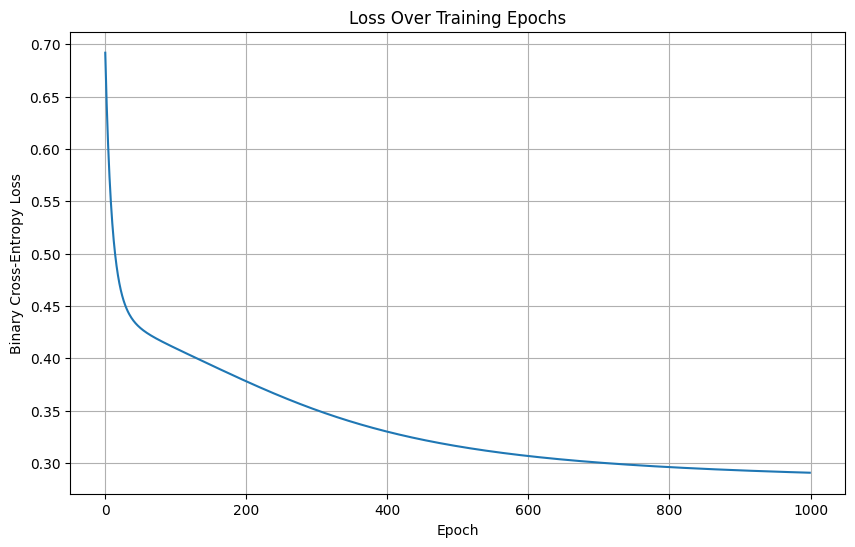

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Prepare data similar to logistic regression
df = pd.read_csv("telecom.csv")
df = df.drop(columns=["ID", "Tariff plan", "Complaints"])
df = pd.get_dummies(df, columns=["Status", "Age group"], drop_first=True)

X = df.drop("Churn", axis=1).values
y = df["Churn"].values.reshape(-1, 1)

scaler = StandardScaler() # Scale data
X = scaler.fit_transform(X)

# Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def binary_cross_entropy(y_hat, y):
    epsilon = 1e-15
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

# Bulk of the neural network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2

    def backward(self, X, y, learning_rate=0.01):
        m = y.shape[0]
        dZ2 = self.A2 - y
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * sigmoid_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def train(self, X, y, epochs=1000, learning_rate=0.1):
        self.losses = []
        for i in range(epochs):
            y_hat = self.forward(X)
            loss = binary_cross_entropy(y_hat, y)
            self.losses.append(loss)
            self.backward(X, y, learning_rate)
            if i % 100 == 0:
                print(f"Epoch {i}: Loss = {loss:.4f}")

    def predict(self, X):
        return self.forward(X) > 0.5

# Training and testing the neural network
nn = NeuralNetwork(input_size=X_train.shape[1], hidden_size=5, output_size=1)
nn.train(X_train, y_train, epochs=1000, learning_rate=0.1)

predictions = nn.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.2%}")

# Plot loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(nn.losses)
plt.title("Loss Over Training Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.grid(True)
plt.show()


Testing this neural network gives us a 84% accuracy rate along with a graph that shows decreasing loss over time. This graph shows that the neural network is learning over time. However, it takes a lot of epochs and the test accuracy could be improved.

Now, I will essentially redo the first neural network but there is an important difference. The first neural network had a single hidden layer with a fixed number of neurons. This time I will have it where it support multiple hidden layers and has flexible architecture. I can even change the number of size of hidden layers as needed.

So let's see how it ends up being.

Epoch 1, Loss: 0.3975
Epoch 2, Loss: 0.3251
Epoch 3, Loss: 0.2945
Epoch 4, Loss: 0.2850
Epoch 5, Loss: 0.2802
Epoch 6, Loss: 0.2773
Epoch 7, Loss: 0.2754
Epoch 8, Loss: 0.2742
Epoch 9, Loss: 0.2733
Epoch 10, Loss: 0.2727
Epoch 11, Loss: 0.2722
Epoch 12, Loss: 0.2717
Epoch 13, Loss: 0.2711
Epoch 14, Loss: 0.2703
Epoch 15, Loss: 0.2690
Epoch 16, Loss: 0.2670
Epoch 17, Loss: 0.2638
Epoch 18, Loss: 0.2595
Epoch 19, Loss: 0.2549
Epoch 20, Loss: 0.2503
Epoch 21, Loss: 0.2462
Epoch 22, Loss: 0.2428
Epoch 23, Loss: 0.2402
Epoch 24, Loss: 0.2383
Epoch 25, Loss: 0.2368
Epoch 26, Loss: 0.2356
Epoch 27, Loss: 0.2348
Epoch 28, Loss: 0.2341
Epoch 29, Loss: 0.2336
Epoch 30, Loss: 0.2333
Epoch 31, Loss: 0.2331
Epoch 32, Loss: 0.2330
Epoch 33, Loss: 0.2329
Epoch 34, Loss: 0.2328
Epoch 35, Loss: 0.2328
Epoch 36, Loss: 0.2327
Epoch 37, Loss: 0.2326
Epoch 38, Loss: 0.2324
Epoch 39, Loss: 0.2323
Epoch 40, Loss: 0.2321
Epoch 41, Loss: 0.2319
Epoch 42, Loss: 0.2317
Epoch 43, Loss: 0.2314
Epoch 44, Loss: 0.23

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_11648/4273539791.py:97: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_preds.append(float(A[-1]))


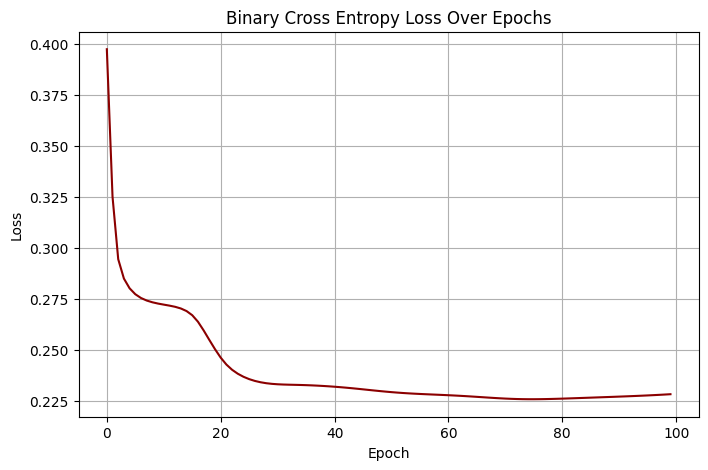

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("telecom.csv")
df.drop(columns=["ID", "Tariff plan", "Complaints"], inplace=True)

df = pd.get_dummies(df, columns=["Status", "Age group"], drop_first=True)

X = df.drop("Churn", axis=1).values
y = df["Churn"].values.reshape(-1, 1)  

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def d_sigmoid(z):
    s = sigmoid(z)
    return s * (1 - s)

def binary_cross_entropy(a, y):
    eps = 1e-15
    a = np.clip(a, eps, 1 - eps)
    return -np.mean(y * np.log(a) + (1 - y) * np.log(1 - a))

def accuracy(y_pred, y_true):
    return np.mean((y_pred > 0.5) == y_true)


class DenseChurnNetwork:
    def __init__(self, layer_dims=[X.shape[1], 10, 1]):
        self.layer_dims = layer_dims
        self.num_layers = len(layer_dims) - 1  
        self.W = [None]  
        self.B = [None]

        for l in range(1, len(layer_dims)):
            weight = np.random.randn(layer_dims[l], layer_dims[l - 1]) * np.sqrt(2 / layer_dims[l - 1])
            bias = np.zeros((layer_dims[l], 1))
            self.W.append(weight)
            self.B.append(bias)

    def forward(self, x):
        A = [x]
        Z = [None] 

        for l in range(1, self.num_layers + 1):
            z = self.W[l] @ A[l - 1] + self.B[l]
            a = sigmoid(z)
            Z.append(z)
            A.append(a)

        return Z, A

    def backward(self, x, y):
        Z, A = self.forward(x)
        L = self.num_layers
        deltas = [None] * (L + 1)

        deltas[L] = (A[L] - y) * d_sigmoid(Z[L])

        for l in range(L - 1, 0, -1):
            deltas[l] = (self.W[l + 1].T @ deltas[l + 1]) * d_sigmoid(Z[l])

        for l in range(1, L + 1):
            self.W[l] -= self.alpha * deltas[l] @ A[l - 1].T
            self.B[l] -= self.alpha * deltas[l]

    def train(self, X_train, y_train, epochs=100, alpha=0.1):
        self.alpha = alpha
        self.losses = []

        for epoch in range(epochs):
            cost = 0
            for xi, yi in zip(X_train, y_train):
                xi = xi.reshape(-1, 1)
                yi = np.array(yi).reshape(1, 1)
                self.backward(xi, yi)
                _, A = self.forward(xi)
                cost += binary_cross_entropy(A[-1], yi)
            avg_cost = cost / len(X_train)
            self.losses.append(avg_cost)
            print(f"Epoch {epoch+1}, Loss: {avg_cost:.4f}")

    def predict(self, X):
        y_preds = []
        for xi in X:
            xi = xi.reshape(-1, 1)
            _, A = self.forward(xi)
            y_preds.append(float(A[-1]))
        return np.array(y_preds).reshape(-1, 1)

model = DenseChurnNetwork(layer_dims=[X.shape[1], 12, 6, 1])
model.train(X_train, y_train, epochs=100, alpha=0.1)

y_pred_test = model.predict(X_test)
test_acc = accuracy(y_pred_test, y_test)
print(f"\nTest Accuracy: {test_acc:.2%}")

plt.figure(figsize=(8, 5))
plt.plot(model.losses, color='darkred')
plt.title("Binary Cross Entropy Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


Wow that was lot of code. But now we have a ~93% accuracy rate AND we get less loss at a much lower number of epochs. This means that the neural network is learning faster and is a lot smarter early on.

Using the second neural network with multiple hidden layers is the way to go and will give the telecom company a great accuracy rate and will be able to be efficient with helping them determine the churn rate for their customers.